In [46]:
import pandas as pd
df_X = pd.read_csv("q1_officer_allegation_type.csv")
df_X.drop('number_same_type_after',axis = 1 , inplace = True)
df_X['category_id'] = df_X['category'].factorize()[0]
#df_X.drop('category',axis = 1 , inplace = True)
df_X.head(100)



,category,years_on_force,number_since_same_type,number_since_total,category_id
0,Operation/Personnel Violations,0,0,0,0
1,Operation/Personnel Violations,0,0,0,0
2,Operation/Personnel Violations,0,0,0,0
3,Criminal Misconduct,0,0,2,1
4,Operation/Personnel Violations,0,0,0,0
5,Operation/Personnel Violations,0,0,0,0
6,Operation/Personnel Violations,0,0,2,0
7,Operation/Personnel Violations,0,0,0,0
8,Operation/Personnel Violations,0,0,0,0
9,Domestic,0,0,0,2


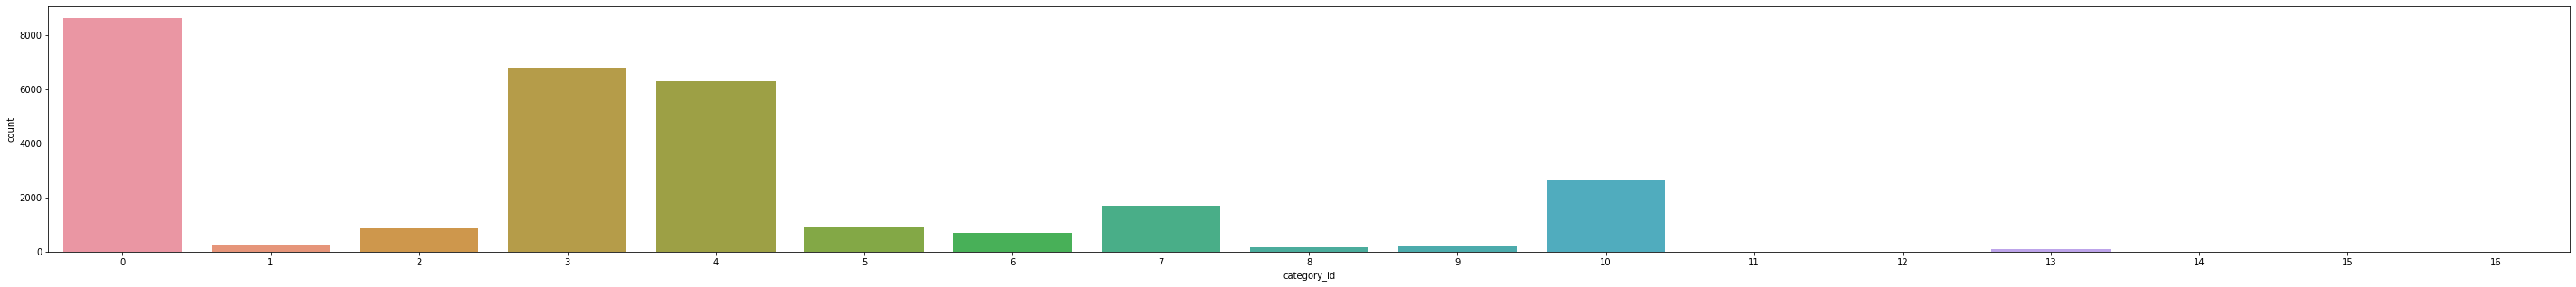

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(50, 5))
sns.countplot(x = "category_id", data = df_X)

In [3]:
Label_Y = pd.read_csv("q1_officer_allegation_type.csv")
Label_Y = Label_Y['number_same_type_after']
Label_Y.head(100)



0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    2
12    3
13    1
14    2
15    0
16    0
17    2
18    0
19    0
20    0
21    1
22    1
23    0
24    0
25    0
26    0
27    0
28    2
29    1
     ..
70    0
71    1
72    0
73    0
74    0
75    2
76    0
77    7
78    2
79    1
80    0
81    0
82    0
83    2
84    1
85    1
86    0
87    6
88    0
89    0
90    1
91    2
92    0
93    1
94    0
95    1
96    1
97    0
98    1
99    1
Name: number_same_type_after, Length: 100, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') 

X_train , X_test , y_train , y_test = train_test_split(df_X , Label_Y , test_size = 0.3 , random_state = 1 )
logmodel = LogisticRegression()
logmodel.fit( X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions= logmodel.predict(X_test)
print(predictions)

[0 1 0 ... 0 0 0]


In [33]:

print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79      5767
           1       0.17      0.02      0.03      1650
           2       0.00      0.00      0.00       690
           3       0.00      0.00      0.00       307
           4       0.00      0.00      0.00       156
           5       0.00      0.00      0.00        86
           6       0.00      0.00      0.00        50
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.65      8783
   macro avg       0.06      0.07      0.06      8783
weighted avg       0.47   

In [34]:
confusion_matrix(y_test , predictions)


array([[5704,   60,    3,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [1618,   30,    2,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 661,   29,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 288,   19,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [ 144,   12,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  72,   14,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  48,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  25,    3,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  20,    4,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0],
       [  13,    2,    0,    0,    0,

In [35]:
accuracy_score(y_test,predictions)


0.652852100648981